# Forecasting

<img src="../img/forecasting.png" width="60%">

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('../data/weather_data.csv', parse_dates=['date_time'], index_col='date_time')

df = df[df["location"]=="Beutenberg"]

# Display the first few rows
df

,pressure_mbar,temperature_celsius,dew_point_celsius,relative_humidity_percent,vapor_pressure_actual_mbar,specific_humidity_g_per_kg,air_density_g_per_m_cubed,wind_velocity_m_per_s,wind_direction_degrees,rainfall_mm,location,season
date_time,,,,,,,,,,,,
2020-01-01 01:00:00,1008.44,0.34,-1.54,87.10,5.45,3.37,1281.84,0.63,188.00,0.0,Beutenberg,winter
2020-01-01 02:00:00,1008.32,-0.21,-1.78,89.10,5.36,3.31,1284.32,0.50,154.00,0.0,Beutenberg,winter
2020-01-01 03:00:00,1008.46,-0.05,-1.71,88.50,5.39,3.33,1283.73,0.46,46.51,0.0,Beutenberg,winter
2020-01-01 04:00:00,1008.00,-1.02,-2.31,90.90,5.15,3.19,1287.83,1.83,218.10,0.0,Beutenberg,winter
2020-01-01 05:00:00,1007.63,-1.84,-2.78,93.20,4.97,3.08,1291.32,1.53,226.90,0.0,Beutenberg,winter
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 20:00:00,978.81,7.44,3.71,77.10,7.97,5.08,1211.47,4.14,214.70,0.0,Beutenberg,winter
2023-12-31 21:00:00,979.18,7.45,3.42,75.57,7.81,4.98,1211.99,2.99,197.30,0.0,Beutenberg,winter
2023-12-31 22:00:00,979.51,7.11,3.04,75.23,7.60,4.84,1213.95,3.51,187.10,0.0,Beutenberg,winter


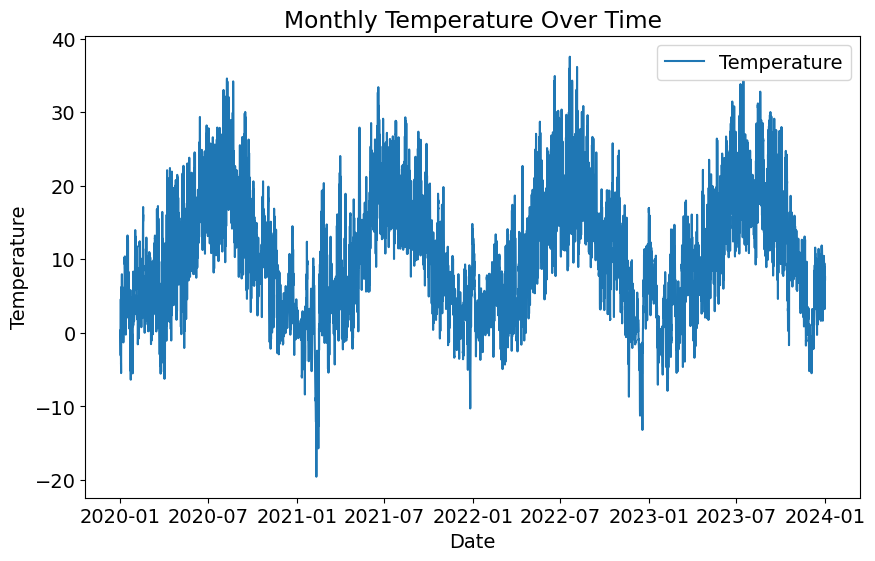

In [11]:
plt.figure(figsize=(10, 6))
# Set larger font sizes
plt.rcParams.update({'font.size': 14})


plt.plot(df.index.to_numpy(), df['temperature_celsius'].to_numpy(), label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Monthly Temperature Over Time')
plt.legend()
plt.show()

In [12]:
# Assuming 'Date' is the column containing the datetime information
df.sort_values(by='date_time', inplace=True)

# After sorting, you can safely assign a 'Time' sequence
df['time'] = np.arange(len(df))

In [13]:
# Prepare the features and target variable
X = df[['time']]  # Feature
y = df['temperature_celsius']  # Target

# Adding a constant to the model (the intercept)
X = add_constant(X)

# Fit the model
model = OLS(y, X).fit()

# Print the summary
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     temperature_celsius   R-squared:                       0.007
Model:                             OLS   Adj. R-squared:                  0.007
Method:                  Least Squares   F-statistic:                     233.2
Date:                 Fri, 20 Dec 2024   Prob (F-statistic):           1.74e-52
Time:                         14:53:34   Log-Likelihood:            -1.2235e+05
No. Observations:                35076   AIC:                         2.447e+05
Df Residuals:                    35074   BIC:                         2.447e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5107      0.085    112.47

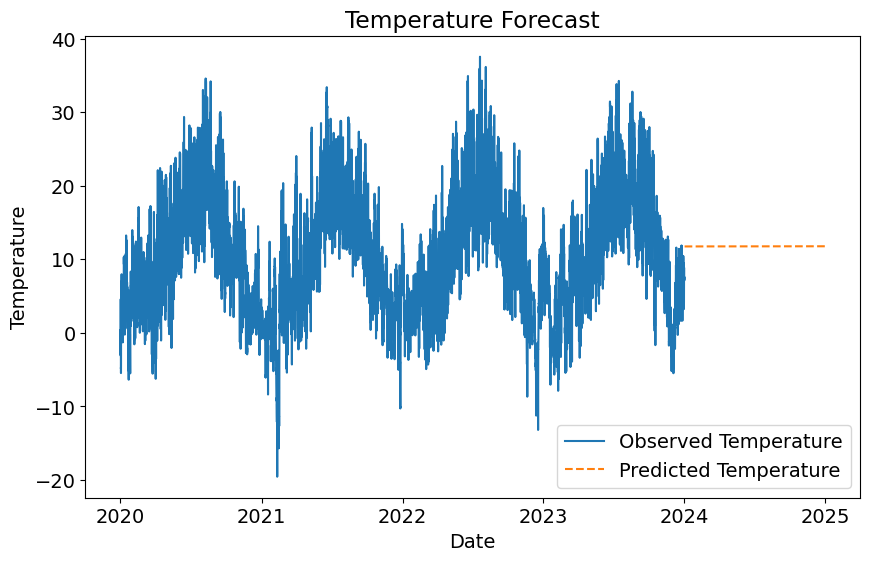

In [14]:
# Creating a new DataFrame for future predictions
future_days = np.arange(len(df), len(df) + 365)
X_future = pd.DataFrame(future_days, columns=['Time'])
X_future = add_constant(X_future)

# Making predictions
predictions = model.predict(X_future)

# Assuming df.index[-1] gives the last date, you want to start predictions from the next day
start_date = df.index[-1] + pd.Timedelta(days=1)

plt.figure(figsize=(10, 6))
plt.plot(df.index.to_numpy(), df['temperature_celsius'].to_numpy(), label='Observed Temperature')

# Generate date range for predictions starting from the day after the last date in df
prediction_dates = pd.date_range(start=start_date, periods=365).to_numpy()

plt.plot(prediction_dates, predictions.to_numpy(), label='Predicted Temperature', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Forecast')
plt.legend()
plt.show()

## Resampling

Resampling doesn't work well with categorical data, so we need to take extra steps.

- Create a copy of the column you want
- Drop categorical columns
- Resample


In [15]:
df_season = df["season"] #save season column for later
df.drop(["season", "location"], axis=1, inplace=True) #drop categorical columns

# resampling
# take the average price for each week
df_weekly = df.resample("W").mean()

# take a look at df_weekly
df_weekly.head()



,pressure_mbar,temperature_celsius,dew_point_celsius,relative_humidity_percent,vapor_pressure_actual_mbar,specific_humidity_g_per_kg,air_density_g_per_m_cubed,wind_velocity_m_per_s,wind_direction_degrees,rainfall_mm,time
date_time,,,,,,,,,,,
2020-01-05,1001.376050,1.975546,-0.996218,81.129076,5.774454,3.597647,1265.353193,1.973109,197.492521,0.003361,59.0
2020-01-12,997.750238,4.480655,1.720655,82.523036,7.071429,4.424762,1248.726726,2.357440,201.811310,0.008929,202.5
2020-01-19,995.655476,5.981607,1.580536,74.470476,6.880595,4.310595,1239.486905,2.484048,202.125536,0.001190,370.5
2020-01-26,1004.325595,-0.702917,-2.728631,86.649345,5.057976,3.138036,1281.802024,0.894762,182.447262,0.000000,538.5
2020-02-02,979.993512,6.869345,2.815238,75.741488,7.664702,4.880298,1215.722500,3.421488,210.946488,0.003571,706.5


In [16]:
df_weekly["idx"] = range(len(df_weekly)) #creates an index column

In [17]:
# set up regression

predictors = [
    "idx"
]

X = sm.add_constant(df_weekly[predictors])
y = df_weekly["temperature_celsius"]

model = sm.OLS(y, X).fit()

print(model.summary())




                             OLS Regression Results                            
Dep. Variable:     temperature_celsius   R-squared:                       0.009
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     1.807
Date:                 Fri, 20 Dec 2024   Prob (F-statistic):              0.180
Time:                         14:53:35   Log-Likelihood:                -701.44
No. Observations:                  210   AIC:                             1407.
Df Residuals:                      208   BIC:                             1414.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5097      0.944     10.07

**Interpreting the t-value:**

The t-value measures how many standard errors the estimated coefficient is away from zero.
A larger absolute t-value indicates stronger evidence against the null hypothesis (i.e., a more significant relationship between the predictor and the dependent variable).
The t-value is used in conjunction with the p-value to determine statistical significance.

**Relationship with the p-value:**

The p-value (P>|t|) is the probability of observing a t-value as extreme as the one calculated (or more extreme) if the null hypothesis were true.
A small p-value (typically less than 0.05) provides strong evidence to reject the null hypothesis and conclude that there's a statistically significant relationship.


**In the output:**
The t-value for "idx" is 1.344, and the corresponding p-value is 0.180.
Since the p-value (0.180) is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This means that there's not enough statistical evidence to conclude that "idx" has a significant effect on "temperature_celsius" in this model.

## Modeling for seasonality

In [25]:
# resampling with categorical

# there are many ways to do this: using the first, mode or last element
df_weekly_seasons = df_season.resample("W").first()

In [26]:
# to be able to use seasons in the model, we will use dummies
season_dummies = pd.get_dummies(df_weekly_seasons, drop_first=True)
season_dummies = season_dummies.astype(int)

In [27]:
season_dummies.head()

,spring,summer,winter
date_time,,,
2020-01-05,0,0,1
2020-01-12,0,0,1
2020-01-19,0,0,1
2020-01-26,0,0,1
2020-02-02,0,0,1


In [28]:
# combine with original df
combined_weekly = pd.concat([df_weekly, season_dummies], axis=1)
combined_weekly.head()

,pressure_mbar,temperature_celsius,dew_point_celsius,relative_humidity_percent,vapor_pressure_actual_mbar,specific_humidity_g_per_kg,air_density_g_per_m_cubed,wind_velocity_m_per_s,wind_direction_degrees,rainfall_mm,time,idx,spring,summer,winter
date_time,,,,,,,,,,,,,,,
2020-01-05,1001.376050,1.975546,-0.996218,81.129076,5.774454,3.597647,1265.353193,1.973109,197.492521,0.003361,59.0,0,0,0,1
2020-01-12,997.750238,4.480655,1.720655,82.523036,7.071429,4.424762,1248.726726,2.357440,201.811310,0.008929,202.5,1,0,0,1
2020-01-19,995.655476,5.981607,1.580536,74.470476,6.880595,4.310595,1239.486905,2.484048,202.125536,0.001190,370.5,2,0,0,1
2020-01-26,1004.325595,-0.702917,-2.728631,86.649345,5.057976,3.138036,1281.802024,0.894762,182.447262,0.000000,538.5,3,0,0,1
2020-02-02,979.993512,6.869345,2.815238,75.741488,7.664702,4.880298,1215.722500,3.421488,210.946488,0.003571,706.5,4,0,0,1


In [29]:
# now we will set the regression again

predictors =  [ "idx", 
"spring", "summer" , "winter"]


X = sm.add_constant(combined_weekly[predictors])
y = df_weekly["temperature_celsius"]

model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     temperature_celsius   R-squared:                       0.677
Model:                             OLS   Adj. R-squared:                  0.670
Method:                  Least Squares   F-statistic:                     107.3
Date:                 Fri, 20 Dec 2024   Prob (F-statistic):           3.71e-49
Time:                         15:05:04   Log-Likelihood:                -583.75
No. Observations:                  210   AIC:                             1178.
Df Residuals:                      205   BIC:                             1194.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3585      0.773     12.10

Explaining the results of the coefficients above:

- the value of R-squared improved a lot from the first model. It means that you are explaining about 68% of the variation in temperature right.
- The value of idx decreased, but it's still not significant in explaning changes in temperature. Maybe if other independent variables are added to the model  this value will decrease more.
- For the seasons (spring, summer and winter), their values are in relationship to autumn, which was left out. So there's a significant difference between temperatures in winter and autumn, as well as summer and autumn, but not autumn and spring (we look at the P value for this). Likewise, on average, being a summer month compared to autumn, adds 9 degrees to the temperature (coef value), and being a winter month compared to autumn decreases 6 degrees.

In [30]:
# making predicitons for the next week in this series

# check last index in the data
combined_weekly.tail()

,pressure_mbar,temperature_celsius,dew_point_celsius,relative_humidity_percent,vapor_pressure_actual_mbar,specific_humidity_g_per_kg,air_density_g_per_m_cubed,wind_velocity_m_per_s,wind_direction_degrees,rainfall_mm,time,idx,spring,summer,winter
date_time,,,,,,,,,,,,,,,
2023-12-10,984.912262,1.504940,0.306786,91.990893,6.393929,4.051131,1246.364048,2.297619,194.439286,0.009524,34486.5,205,0,0,1
2023-12-17,991.984226,5.798274,4.177738,89.842381,8.295952,5.228274,1235.106786,1.960417,205.623571,0.009524,34654.5,206,0,0,1
2023-12-24,982.727381,5.995893,3.387500,84.066071,7.907202,5.025119,1222.777679,3.444524,219.551845,0.033929,34822.5,207,0,0,1
2023-12-31,985.654940,8.207083,4.700179,79.057560,8.626071,5.464583,1216.459881,3.662024,214.436310,0.004167,34990.5,208,0,0,1
2024-01-07,979.650000,7.570000,2.900000,72.200000,7.530000,4.790000,1212.160000,3.850000,203.600000,0.000000,35075.0,209,0,0,1


In [31]:
# predict the temperature for next week
# we use the values we're passing as predictors for the model
model.predict(pd.Series([1, 210, 0, 0, 1]))
# 1 for the constant
# 210 = next index
# 0 = spring, 0= summer, 1=winter

None    4.241527
dtype: float64